# Matrix Inverse

## Exercise 8-1.
##### The inverse of the inverse is the original matrix; in other words, 
(
𝐀
-
1
)
-
1
=
𝐀
. This is analgous to how 
1
/
(
1
/
𝑎
)
=
𝑎
. Illustrate this using Python.

In [1]:
import numpy as np

A= np.random.rand(3,3)

A_inv = np.linalg.inv(A)

A_inv_inv = np.linalg.inv(A_inv)

A, A_inv_inv

(array([[0.89356665, 0.84460956, 0.92390723],
        [0.70601461, 0.73075582, 0.83477707],
        [0.07301655, 0.29729439, 0.60216714]]),
 array([[0.89356665, 0.84460956, 0.92390723],
        [0.70601461, 0.73075582, 0.83477707],
        [0.07301655, 0.29729439, 0.60216714]]))

## Exercise 8-2.

#### Implement the full algorithm described in “Inverting Any Square Full-Rank Matrix” and reproduce Figure 8-3. Of course, your matrices will look different from Figure 8-3 because of random numbers, although the grid and identity matrices will be the same.

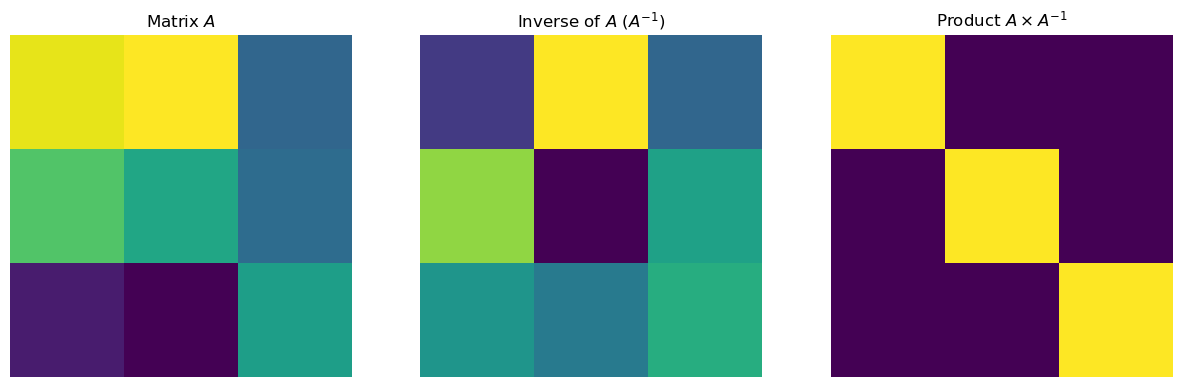

In [2]:
import matplotlib.pyplot as plt

A = np.random.rand(3, 3)

while np.linalg.matrix_rank(A) != 3:
    A = np.random.rand(3, 3)

A_inv = np.linalg.inv(A)
A_product = np.dot(A, A_inv)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(A, cmap='viridis')
axes[0].set_title('Matrix $A$')
axes[0].set_axis_off()

axes[1].imshow(A_inv, cmap='viridis')
axes[1].set_title('Inverse of $A$ ($A^{-1}$)')
axes[1].set_axis_off()

axes[2].imshow(A_product, cmap='viridis')
axes[2].set_title('Product $A \\times A^{-1}$')
axes[2].set_axis_off()

## Exercise 8-4.
#### Derive the right-inverse for wide matrices by following the logic that allowed us to discover the left-inverse. Then reproduce Figure 8-4 for a wide matrix. (Hint: start from the code for the left-inverse and adjust as necessary.)

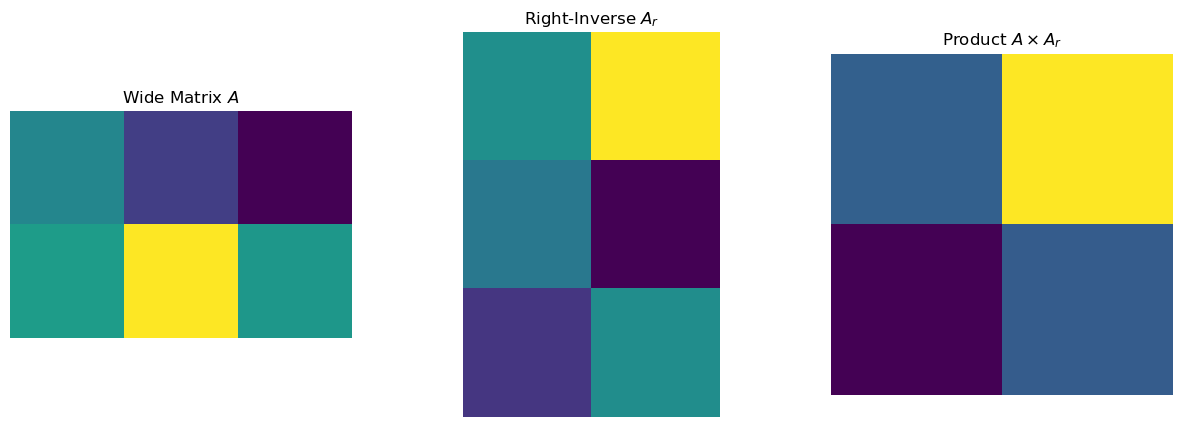

In [3]:
A_wide = np.random.rand(2,3)

A_r = np.dot(np.linalg.inv(np.dot(A_wide.T, A_wide)), A_wide.T)

A_product_wide = np.dot(A_wide, A_r)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(A_wide, cmap='viridis')
axes[0].set_title('Wide Matrix $A$')
axes[0].set_axis_off()

axes[1].imshow(A_r, cmap='viridis')
axes[1].set_title('Right-Inverse $A_r$')
axes[1].set_axis_off()

axes[2].imshow(A_product_wide, cmap='viridis')
axes[2].set_title('Product $A \\times A_r$')
axes[2].set_axis_off()

plt.show()

## Exercise 8-5.

#### Illustrate in Python that the pseudoinverse (via np.linalg.pinv) equals the full inverse (via np.linalg.inv) for an invertible matrix. Next, illustrate that the pseudoinverse equals the left-inverse for a tall full column-rank matrix, and that it equals the right-inverse for a wide full row-rank matrix.

- Pseudoinverse equals the full inverse for an invertible square matrix.
- Pseudoinverse equals the left-inverse for a tall full column-rank matrix.
- Pseudoinverse equals the right-inverse for a wide full row-rank matrix.

In [4]:
A_square = np.random.rand(3,3)

pinv_square = np.linalg.pinv(A_square)
inv_square = np.linalg.inv(A_square)

A_tall = np.random.rand(4,2)
pinv_tall = np.linalg.pinv(A_tall)
left_inv_tall = np.dot(np.linalg.inv(np.dot(A_tall.T, A_tall)), A_tall.T)

A_wide = np.random.rand(2,4)
pinv_wide = np.linalg.pinv(A_wide)
right_inv_wide = np.dot(np.linalg.inv(np.dot(A_wide.T, A_wide)), A_wide.T)

comparisons = {
    "Scenario 1 - Square Matrix (Pseudoinverse vs Full Inverse)": np.allclose(pinv_square, inv_square),
    "Scenario 2 - Tall Matrix (Pseudoinverse vs Left-Inverse)": np.allclose(pinv_tall, left_inv_tall),
    "Scenario 3 - Wide Matrix (Pseudoinverse vs Right-Inverse)": np.allclose(pinv_wide, right_inv_wide),
}

comparisons

{'Scenario 1 - Square Matrix (Pseudoinverse vs Full Inverse)': True,
 'Scenario 2 - Tall Matrix (Pseudoinverse vs Left-Inverse)': True,
 'Scenario 3 - Wide Matrix (Pseudoinverse vs Right-Inverse)': False}

## Applications

- Linear Regression: The pseudoinverse is crucial for solving linear regression problems, especially in cases where the feature matrix is not invertible (e.g., with more features than observations or collinear variables).
- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) utilize the pseudoinverse for projecting data into a lower-dimensional space while retaining most of the variance.